# **Equipo: VisionRisk Analytics**


**• Presentación del Equipo**
- Somos un equipo especializado en analítica de riesgo de crédito especializado, combinamos conocimiento técnico con claridad de negocio para crear modelos útiles y explicables.

**• Contexto del problema**
- CooperativaPUCP busca crecer y liderar su segmento reduciendo costos y apoyándose en machine learning, migrando del juicio experto hacia decisiones basadas en datos para riesgo de crédito.

**• Planteamiento de resolución**
- Usaremos CRISP-ML(Q) de forma flexible:
    - Analizar negocio y datos históricos de créditos.
    - Preparar y limpiar datos para modelos.
    - Probar múltiples algoritmos de clasificación.
    - Evaluar con F1-Score y explicar resultados.
    - Entregable en Python (Google Colab)

- Buscamos demostrar cómo machine learning puede mejorar las decisiones de riesgo de crédito con eficiencia, alineando tecnología y negocio para el crecimiento de CooperativaPUCP.

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
DATA_PATH = '/content/drive/MyDrive/CICLO 2025-1/PROGRAMACIÓN EN FINANZAS/FINAL/bd_loans_assessment.csv'

# Descripción de datos

**Loan_ID** (Categórica)
- **Descripción:** Identificador único del préstamo
- **Valores:** Único para cada observación

**Gender** (Categórica)
- **Descripción:** Género del solicitante
- **Valores:** `Male`, `Female`

**Married** (Categórica)
- **Descripción:** Estado civil del solicitante
- **Valores:** `Married`, `Single`, `Divorced`

**Dependents** (Numérica)
- **Descripción:** Número de dependientes
- **Valores:** Enteros (0, 1, 2, etc.)

**Education** (Categórica)
- **Descripción:** Nivel educativo del solicitante
- **Valores:** `Graduate`, `Not Graduate`

**Self_Employed** (Categórica)
- **Descripción:** Indica si es independiente
- **Valores:** `Self-employed`, `Not Self-employed`

**ApplicantIncome** (Numérica)
- **Descripción:** Ingreso mensual del solicitante
- **Valores:** Números enteros

**CoapplicantIncome** (Numérica)
- **Descripción:** Ingreso mensual del co-solicitante
- **Valores:** Números enteros

**LoanAmount** (Numérica)
- **Descripción:** Monto solicitado para el préstamo
- **Valores:** Números reales

**Loan_Amount_Term** (Numérica)
- **Descripción:** Número de cuotas del préstamo
- **Valores:** Números enteros (generalmente múltiplos de 12)

**Credit_History** (Categórica)
- **Descripción:** Si tiene historial crediticio
- **Valores:** `1` (tiene historial), `0` (no tiene historial)

**Property_Area** (Categórica)
- **Descripción:** Ubicación geográfica de la propiedad
- **Valores:** `Urban`, `Semiurban`, `Rural`

**Loan_Status** (Categórica - Target)
- **Descripción:** Estado del préstamo (default o no)
- **Valores:** `Y` (default), `N` (no default)


# 1. Análisis Univariado

In [3]:
df = pd.read_csv(DATA_PATH)
print('Dimensiones originales:', df.shape)
display(df.head())

Dimensiones originales: (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [5]:
from IPython.display import display

# Estadísticas descriptivas para variables numéricas
desc_num_df = df.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).transpose()

# Estadísticas descriptivas para variables categóricas
desc_cat_df = df.describe(include='object').T

print("Variables Numéricas")
display(desc_num_df)

print("")
print("")

print("Variables Categóricas")
display(desc_cat_df)

Variables Numéricas


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,1025.0,1897.55,2877.5,3812.5,5795.00,14583.0,32540.41,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,0.00,0.0,1188.5,2297.25,4997.4,8895.89,41667.0
LoanAmount,589.0,146.405772,85.757311,9.0,30.0,56.00,100.0,128.0,168.00,298.4,496.48,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,84.0,180.00,360.0,360.0,360.00,360.0,480.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,0.0,0.00,1.0,1.0,1.00,1.0,1.00,1.0




Variables Categóricas


,count,unique,top,freq
Loan_ID,614,614,LP002990,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,607,2,Graduate,474
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


In [6]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,7
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,25
Loan_Amount_Term,14


In [7]:
unknown_counts = df.apply(lambda col: (col.astype(str).str.lower() == 'unknown').sum())
unknown_counts = unknown_counts[unknown_counts > 0]

print(unknown_counts)

Series([], dtype: int64)


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

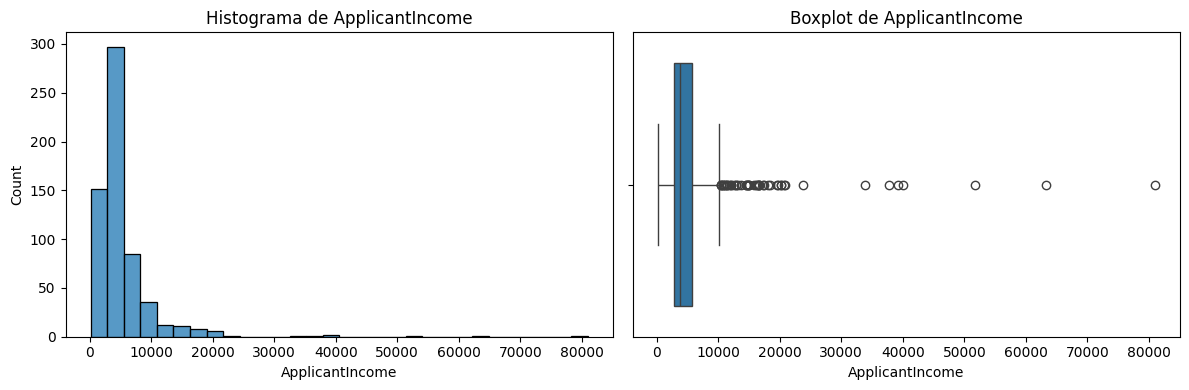

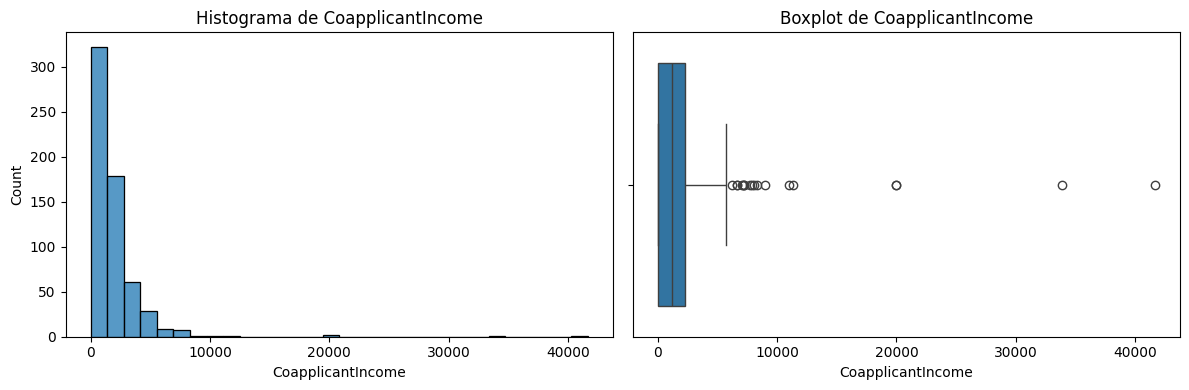

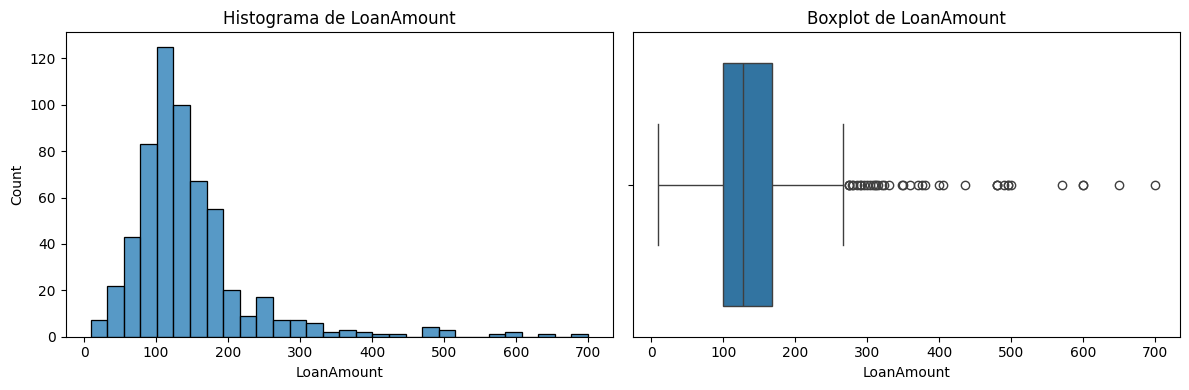

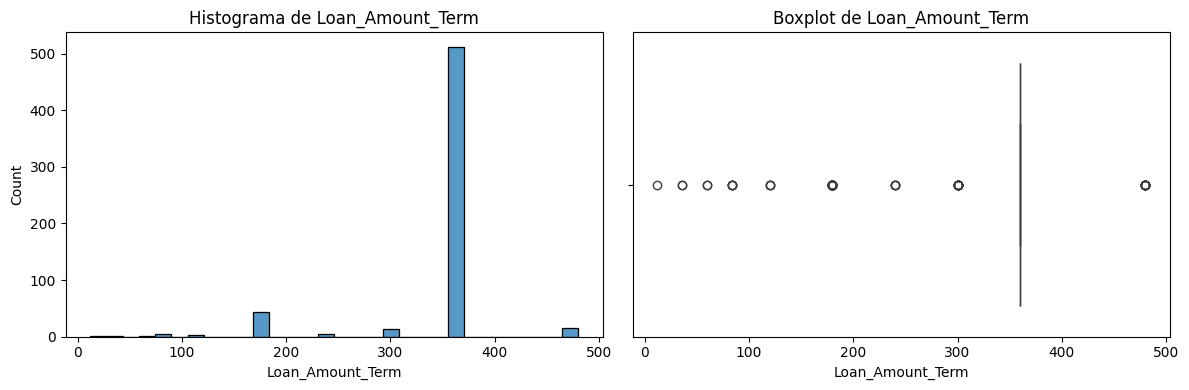

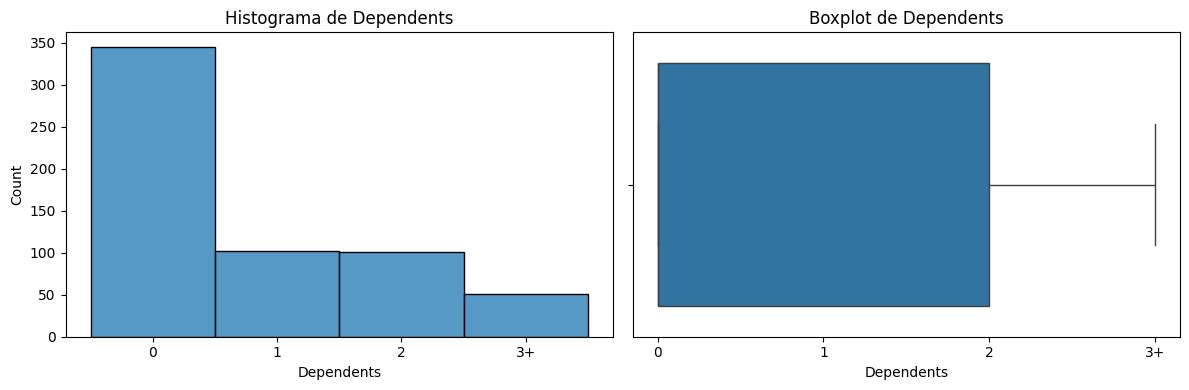

In [9]:
# Lista de variables numéricas
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Dependents']

# Crear un gráfico de histograma y boxplot para cada variable numérica
for col in num_cols:
    plt.figure(figsize=(12, 4))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30)
    plt.title(f'Histograma de {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')

    plt.tight_layout()
    plt.show()

***TRATAMOS LOS MISSINGS***

In [10]:
df_limpio = df.copy()

In [11]:
# Si es '3+', lo convertimos a 3
df_limpio['Dependents'] = df_limpio['Dependents'].replace({'3+': 3}).astype(float)

In [12]:
# Variables numéricas a imputar con la mediana
num_cols = ['LoanAmount', 'Loan_Amount_Term', 'Dependents', 'Credit_History']
for col in num_cols:
    mediana = df_limpio[col].median()
    df_limpio[col].fillna(mediana, inplace=True)

# Variables categóricas a imputar con la moda
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed']
for col in cat_cols:
    moda = df_limpio[col].mode()[0]
    df_limpio[col].fillna(moda, inplace=True)

df_limpio.isnull().sum()

/tmp/ipython-input-12-3449397762.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio[col].fillna(mediana, inplace=True)
/tmp/ipython-input-12-3449397762.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [13]:
from IPython.display import display

# Estadísticas descriptivas para variables numéricas
desc_num_df = df_limpio.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).transpose()

# Estadísticas descriptivas para variables categóricas
desc_cat_df = df_limpio.describe(include='object').T

print("Variables Numéricas")
display(desc_num_df)

print("")
print("")

print("Variables Categóricas")
display(desc_cat_df)

Variables Numéricas


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Dependents,614.0,0.744300,1.009623,0.0,0.00,0.00,0.00,0.0,1.00,3.0,3.00,3.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,1025.00,1897.55,2877.50,3812.5,5795.00,14583.0,32540.41,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,0.00,0.00,1188.5,2297.25,4997.4,8895.89,41667.0
LoanAmount,614.0,145.656352,84.069249,9.0,30.65,57.30,100.25,128.0,163.50,293.4,495.87,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,84.00,180.00,360.00,360.0,360.00,360.0,480.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,0.00,0.00,1.00,1.0,1.00,1.0,1.00,1.0




Variables Categóricas


,count,unique,top,freq
Loan_ID,614,614,LP002990,1
Gender,614,2,Male,502
Married,614,2,Yes,401
Education,614,2,Graduate,481
Self_Employed,614,2,No,532
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


***TRATAMOS LOS OUTLAIERS***

In [14]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Dependents']
cotas = df_limpio[num_cols].describe(percentiles=[0.01, 0.02, 0.15, 0.25, 0.45, 0.5, 0.98, 0.99]).T
cotas.reset_index(inplace=True)
cotas.rename(columns={"index": "variable"}, inplace=True)

cotas

,variable,count,mean,std,min,1%,2%,15%,25%,45%,50%,98%,99%,max
0,ApplicantIncome,614.0,5403.459283,6109.041673,150.0,1025.00,1554.12,2478.7,2877.50,3597.85,3812.5,19666.04,32540.41,81000.0
1,CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,0.00,0.0,0.00,241.70,1188.5,7198.56,8895.89,41667.0
2,LoanAmount,614.0,145.656352,84.069249,9.0,30.65,44.00,87.0,100.25,124.00,128.0,427.94,495.87,700.0
3,Loan_Amount_Term,614.0,342.410423,64.428629,12.0,84.00,180.00,360.0,360.00,360.00,360.0,480.00,480.00,480.0
4,Dependents,614.0,0.744300,1.009623,0.0,0.00,0.00,0.0,0.00,0.00,0.0,3.00,3.00,3.0


In [15]:
def acotar_valores(x, inf, sup):
    if x < inf:
        return inf
    elif x > sup:
        return sup
    else:
        return x

for index, variable in enumerate(cotas.variable):
    if variable == "ApplicantIncome":
        cotas_Inf = cotas.loc[index, "1%"]
        cotas_Sup = cotas.loc[index, "99%"]
    elif variable == "CoapplicantIncome":
        cotas_Inf = cotas.loc[index, "1%"]
        cotas_Sup = cotas.loc[index, "99%"]
    elif variable == "LoanAmount":
        cotas_Inf = cotas.loc[index, "1%"]
        cotas_Sup = cotas.loc[index, "99%"]
    else:
        continue

    print(f"{variable} --> Límites (Inf, Sup): ({round(cotas_Inf,2)}, {round(cotas_Sup,2)})")

    df_limpio[variable] = df_limpio[variable].apply(lambda x: acotar_valores(x, cotas_Inf, cotas_Sup))


ApplicantIncome --> Límites (Inf, Sup): (1025.0, 32540.41)
CoapplicantIncome --> Límites (Inf, Sup): (0.0, 8895.89)
LoanAmount --> Límites (Inf, Sup): (30.65, 495.87)


In [16]:
# Estadísticas descriptivas para variables numéricas
desc_num_df2 = df_limpio.describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]).transpose()
display(desc_num_df2)

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
Dependents,614.0,0.744300,1.009623,0.00,0.0000,0.00,0.00,0.0,1.00,3.0,3.0000,3.00
ApplicantIncome,614.0,5214.577964,4528.770082,1025.00,1025.0000,1897.55,2877.50,3812.5,5795.00,14583.0,31404.5467,32540.41
CoapplicantIncome,614.0,1483.654967,1831.226927,0.00,0.0000,0.00,0.00,1188.5,2297.25,4997.4,8822.7143,8895.89
LoanAmount,614.0,144.691596,78.471599,30.65,31.2155,57.30,100.25,128.0,163.50,293.4,495.7569,495.87
Loan_Amount_Term,614.0,342.410423,64.428629,12.00,84.0000,180.00,360.00,360.0,360.00,360.0,480.0000,480.00
Credit_History,614.0,0.855049,0.352339,0.00,0.0000,0.00,1.00,1.0,1.00,1.0,1.0000,1.00


# 2. Feature Engineering.

**ApplicantIncome** --> **Scaled_ApplicantIncome**
- Escalado con **StandardScaler**.

**CoapplicantIncome** --> **Scaled_CoapplicantIncome**
- Escalado con **RobustScaler**.

**LoanAmount** --> **Scaled_LoanAmount**
- Escalado con **MinMaxScaler**.

**Loan_Amount_Term** --> **Scaled_Loan_Amount_Term**
- Escalado con **MinMaxScaler**.

**Gender** --> **Gender_Encoded**
- Codificación binaria: **Male** = 0, **Female** = 1.

**Married** --> **Married_Flag**
- Flag binario: **Yes** = 1, **No** = 0.

**Education** --> **Education_Encoded**
- Codificación binaria: **Graduate** = 1, **Not Graduate** = 0.

**Self_Employed** --> **SelfEmployed_Flag**
- Flag binario: **Yes** = 1, **No** = 0.

**Loan_Status** --> **Loan_Status_Encoded**
- Codificación binaria: **Y** = 1, **N** = 0.

**Dependents** --> **Dependents_Flag**
- Flag binario: **>0 dependents** = 1, **0 dependents** = 0.

**Property_Area** --> **Property_Area_Urban, Property_Area_Semiurban**
- One-Hot Encoding: **Urban** y **Semiurban** con valores 1/0.

In [17]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
import pandas as pd

df_ajustado = df_limpio.copy()

# Escaladores
scaler_standard = StandardScaler()
scaler_robust = RobustScaler()
scaler_minmax = MinMaxScaler()
scaler_maxabs = MaxAbsScaler()

# Reescalado de las variables numéricas según corresponda
df_ajustado['Scaled_ApplicantIncome'] = scaler_standard.fit_transform(df_ajustado[['ApplicantIncome']])
df_ajustado['Scaled_CoapplicantIncome'] = scaler_robust.fit_transform(df_ajustado[['CoapplicantIncome']])
df_ajustado['Scaled_LoanAmount'] = scaler_minmax.fit_transform(df_ajustado[['LoanAmount']])
df_ajustado['Scaled_Loan_Amount_Term'] = scaler_minmax.fit_transform(df_ajustado[['Loan_Amount_Term']])

# Transformaciones para las variables categóricas
df_ajustado['Gender_Encoded'] = df_ajustado['Gender'].map({'Male': 0, 'Female': 1})
df_ajustado['Married_Flag'] = df_ajustado['Married'].map({'Yes': 1, 'No': 0})
df_ajustado['Education_Encoded'] = df_ajustado['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df_ajustado['SelfEmployed_Flag'] = df_ajustado['Self_Employed'].map({'Yes': 1, 'No': 0})
df_ajustado['Loan_Status_Encoded'] = df_ajustado['Loan_Status'].map({'Y': 1, 'N': 0})

# Crear un flag para Dependents (si tiene dependientes o no)
df_ajustado['Dependents_Flag'] = df_ajustado['Dependents'].apply(lambda x: 1 if x > 0 else 0)

# One-Hot Encoding para Property_Area (como variable categórica con tres categorías)
df_ajustado = pd.get_dummies(df_ajustado, columns=['Property_Area'], drop_first=True)

df_ajustado.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Scaled_LoanAmount,Scaled_Loan_Amount_Term,Gender_Encoded,Married_Flag,Education_Encoded,SelfEmployed_Flag,Loan_Status_Encoded,Dependents_Flag,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,128.0,360.0,...,0.209256,0.74359,0,0,1,0,1,0,False,True
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,...,0.209256,0.74359,0,1,1,0,0,1,False,False
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,...,0.075986,0.74359,0,1,1,1,1,0,False,True
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,...,0.192060,0.74359,0,1,0,0,1,0,False,True
4,LP001008,Male,No,0.0,Graduate,No,6000.0,0.0,141.0,360.0,...,0.237200,0.74359,0,0,1,0,1,0,False,True


**WOE**

**WOE (Weight of Evidence)**:
- **Definición**: Técnica de transformación que convierte variables categóricas en variables numéricas.
- **Cálculo**: Se basa en la **razón entre la distribución de buenos (evento 1)** y **malos (evento 0)**
- **Uso**: Ayuda a medir el **impacto de cada categoría** sobre la variable objetivo binaria, mejorando la interpretabilidad de modelos como la regresión logística.
- **Valor**: **Positivo** → mayor probabilidad de éxito. **Negativo** → menor probabilidad de éxito.

In [18]:
!pip install woe-conversion

import pandas as pd
from woe_conversion.woe import WoeConversion

In [19]:
df_ajustado_woe = df_ajustado.copy()

target = 'Loan_Status_Encoded'

features = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area_Urban', 'Property_Area_Semiurban', 'Credit_History']

woemodel = WoeConversion(binarytarget=target, features=features)
woemodel.fit(df_ajustado_woe)

woe_values = woemodel.transform(df_ajustado_woe)

for feature in features:
    df_ajustado_woe[f'{feature}_WOE'] = woe_values[feature]

df_ajustado_woe[['Gender_WOE', 'Married_WOE', 'Education_WOE', 'Self_Employed_WOE', 'Property_Area_Urban_WOE', 'Property_Area_Semiurban_WOE', 'Credit_History_WOE']].head()

,Gender_WOE,Married_WOE,Education_WOE,Self_Employed_WOE,Property_Area_Urban_WOE,Property_Area_Semiurban_WOE,Credit_History_WOE
0,0.01839,-0.259118,0.102730,0.003136,-0.131267,-0.221702,0.540288
1,0.01839,0.148063,0.102730,0.003136,0.066732,-0.221702,0.540288
2,0.01839,0.148063,0.102730,-0.020255,-0.131267,-0.221702,0.540288
3,0.01839,0.148063,-0.344305,0.003136,-0.131267,-0.221702,0.540288
4,0.01839,-0.259118,0.102730,0.003136,-0.131267,-0.221702,0.540288


In [20]:
woe_unique_values = pd.DataFrame()

for feature in features:
    woe_unique_values[feature] = df_ajustado_woe[f'{feature}_WOE'].unique()

woe_unique_values.head()

,Gender,Married,Education,Self_Employed,Property_Area_Urban,Property_Area_Semiurban,Credit_History
0,0.01839,-0.259118,0.102730,0.003136,-0.131267,-0.221702,0.540288
1,-0.08094,0.148063,-0.344305,-0.020255,0.066732,0.410892,-3.248319


**INTERPRETACIÓN**

**Credit History**
- **Yes**: +0.540288 → Mayor probabilidad de aprobación de préstamo.
- **No**: -3.248319 → Menor probabilidad de aprobación de préstamo.

**Gender**
- **Male**: +0.01839 → Mayor probabilidad de aprobación de préstamo.
- **Female**: -0.08094 → Menor probabilidad de aprobación de préstamo.

**Married**
- **Yes**: +0.14806 → Mayor probabilidad de aprobación de préstamo.
- **No**: -0.25912 → Menor probabilidad de aprobación de préstamo.

**Education**
- **Graduate**: +0.10273 → Mayor probabilidad de aprobación de préstamo.
- **Not Graduate**: -0.34431 → Menor probabilidad de aprobación de préstamo.

**Self_Employed**
- **No**: +0.00314 → Levelemente mayor probabilidad de aprobación de préstamo.
- **Yes**: -0.02026 → Levelemente menor probabilidad de aprobación de préstamo.

**Property_Area_Urban**
- **Urban**: -0.13127 → Menor probabilidad de aprobación de préstamo.

**Property_Area_Semiurban**
- **Semiurban**: +0.41089 → Mayor probabilidad de aprobación de préstamo.

### 3. Sampling y Balanceo de datos

A. La muestra deberá trabajar estratificada de train-test será de 70:30 con
semilla 45

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
#Target binario de modelamiento:
#eliminar Loan_ID del dataset antes del split
X = df_ajustado.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df_ajustado['Loan_Status_Encoded']

In [23]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Scaled_LoanAmount,Scaled_Loan_Amount_Term,Gender_Encoded,Married_Flag,Education_Encoded,SelfEmployed_Flag,Loan_Status_Encoded,Dependents_Flag,Property_Area_Semiurban,Property_Area_Urban
0,Male,No,0.0,Graduate,No,5849.0,0.0,128.0,360.0,1.0,...,0.209256,0.74359,0,0,1,0,1,0,False,True
1,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,...,0.209256,0.74359,0,1,1,0,0,1,False,False
2,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,...,0.075986,0.74359,0,1,1,1,1,0,False,True
3,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,...,0.192060,0.74359,0,1,0,0,1,0,False,True
4,Male,No,0.0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,...,0.237200,0.74359,0,0,1,0,1,0,False,True


In [24]:
y.head()

,Loan_Status_Encoded
0,1
1,0
2,1
3,1
4,1


In [25]:
#separación de muestras
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 45, stratify=y)

In [26]:
#métodos de balanceo de clases en train
y_train.value_counts()

,count
Loan_Status_Encoded,
1,295
0,134


In [27]:
y_train.value_counts(normalize=True)

,proportion
Loan_Status_Encoded,
1,0.687646
0,0.312354


B. Deberá considerar métodos de balanceo de datos para la muestra de
muestra train en caso evidencie un desbalanceo de datos (P.e. Smote,
SmoteNC que soporta categóricos)

In [28]:
from imblearn.over_sampling import SMOTENC
from collections import Counter

In [29]:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
categorical_indices = [X_train.columns.get_loc(col) for col in categorical_cols]

print("\nColumnas categóricas:")
print(categorical_cols.tolist())


Columnas categóricas:
['Gender', 'Married', 'Education', 'Self_Employed']


In [30]:
smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=45)
X_train_bal, y_train_bal = smote_nc.fit_resample(X_train, y_train)

print("\nDistribución original en y_train:")
y_train.value_counts()


Distribución original en y_train:


,count
Loan_Status_Encoded,
1,295
0,134


In [31]:
print("\nDistribución balanceada en y_train_bal:")
y_train_bal.value_counts()


Distribución balanceada en y_train_bal:


,count
Loan_Status_Encoded,
0,295
1,295


In [32]:
X_train_encoded = pd.get_dummies(X_train_bal, drop_first=True)

print("Shape de X_train_encoded:", X_train_encoded.shape)
print("Columnas disponibles:", X_train_encoded.columns.tolist())

Shape de X_train_encoded: (590, 22)
Columnas disponibles: ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Scaled_ApplicantIncome', 'Scaled_CoapplicantIncome', 'Scaled_LoanAmount', 'Scaled_Loan_Amount_Term', 'Gender_Encoded', 'Married_Flag', 'Education_Encoded', 'SelfEmployed_Flag', 'Loan_Status_Encoded', 'Dependents_Flag', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Gender_Male', 'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes']


# 4. Análisis Multivariado



In [33]:
X_train_encoded = X_train_encoded.drop(columns=['Loan_Status_Encoded'])

**Métodos de reducción por matriz de correlación (>70%)**


In [34]:
correlation_matrix = X_train_encoded.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.70)]
print("Variables eliminadas por alta correlación (>0.70):")
print(high_corr_features)

X_corr_reduced = X_train_encoded.drop(columns=high_corr_features, errors='ignore')

Variables eliminadas por alta correlación (>0.70):
['Scaled_ApplicantIncome', 'Scaled_CoapplicantIncome', 'Scaled_LoanAmount', 'Scaled_Loan_Amount_Term', 'Dependents_Flag', 'Gender_Male', 'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes']


**Reducción por VIF**

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values.astype(float), i) for i in range(df.shape[1])]
    return vif_data

X_vif_input = X_corr_reduced.select_dtypes(include=[np.number]).copy()
vif_df = calculate_vif(X_vif_input)

high_vif_features = vif_df[vif_df['VIF'] > 5]['feature'].tolist()
print("Variables eliminadas por VIF > 5:")
print(high_vif_features)

X_vif_reduced = X_corr_reduced.drop(columns=high_vif_features, errors='ignore')

Variables eliminadas por VIF > 5:
['LoanAmount', 'Loan_Amount_Term']


**Reducción por RFE**

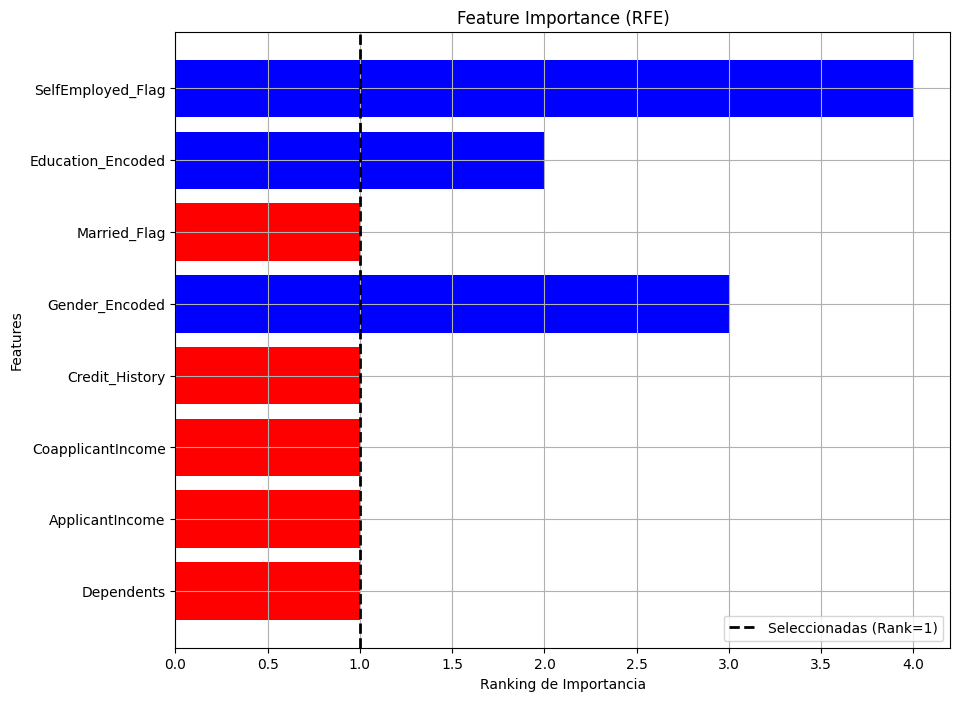

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import numpy as np

def Top_FeaturesRFE(rfe_fit, columns_evaluated):
    pos = np.arange(len(columns_evaluated)) + 0.5
    ranking = rfe_fit.ranking_
    colors = ['red' if r == 1 else 'blue' for r in ranking]

    plt.figure(figsize=(10, 8))
    plt.barh(pos, ranking, align='center', color=colors)
    plt.title("Feature Importance (RFE)")
    plt.xlabel("Ranking de Importancia")
    plt.ylabel("Features")
    plt.axvline(1, color='black', linestyle='--', lw=2, label='Seleccionadas (Rank=1)')
    plt.yticks(pos, columns_evaluated)
    plt.grid(True)
    plt.legend()
    plt.show()

    features_selected = columns_evaluated[rfe_fit.support_]
    return features_selected

model = RandomForestClassifier(max_depth=4, n_estimators=20, random_state=45)
rfe = RFE(model, step=1, n_features_to_select=5)
rfe_rfc = rfe.fit(X_vif_reduced.select_dtypes(include=[np.number]), y_train_bal)
features_seleccionadas = Top_FeaturesRFE(rfe_rfc, X_vif_reduced.select_dtypes(include=[np.number]).columns)


In [37]:
print("Variables seleccionadas por RFE tras Correlación y VIF:")
features_seleccionadas


Variables seleccionadas por RFE tras Correlación y VIF:


Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'Credit_History',
       'Married_Flag'],
      dtype='object')

**Variables seleccionadas por RFE (Rank = 1):**
'Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'Credit_History',
       'Married_Flag'


**Método de reducción por PCA**

In [38]:
pip install varclushi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.1 MB/s eta 0:00:00


In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

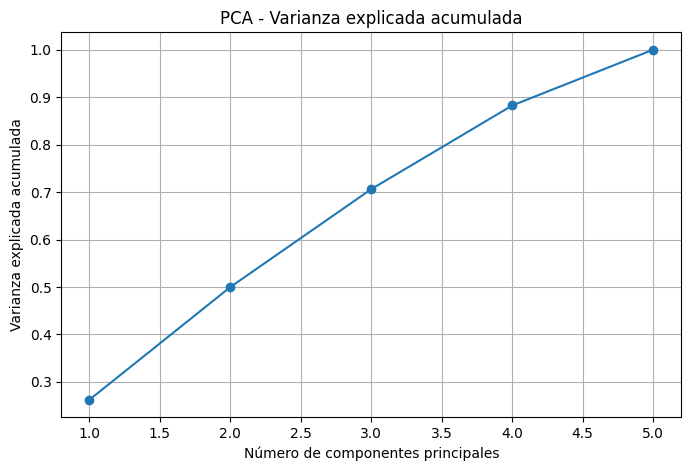

In [40]:
X_pca_base = X_train_bal[features_seleccionadas]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_base)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)
varianza_exp = pca.explained_variance_ratio_
varianza_acum = varianza_exp.cumsum()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_acum) + 1), varianza_acum, marker='o')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('PCA - Varianza explicada acumulada')
plt.grid(True)
plt.show()

In [41]:
pca_df = pd.DataFrame({
    'Componente': [f'PC{i+1}' for i in range(len(varianza_exp))],
    'Varianza_Explicada': varianza_exp,
    'Varianza_Acumulada': varianza_acum
})

pca_df

,Componente,Varianza_Explicada,Varianza_Acumulada
0,PC1,0.262346,0.262346
1,PC2,0.237502,0.499848
2,PC3,0.206310,0.706159
3,PC4,0.176316,0.882475
4,PC5,0.117525,1.000000


In [42]:
# Definir n_componentes para capturar ~90% de varianza
n_componentes = (varianza_acum < 0.90).sum() + 1
print(f"Número de componentes seleccionados para explicar ~90% de la varianza: {n_componentes}")

Número de componentes seleccionados para explicar ~90% de la varianza: 5


**Anáisis bivariante variable X vs target**

In [43]:
pca_df_completo = pd.DataFrame(X_pca[:, :n_componentes], columns=[f'PC{i+1}' for i in range(n_componentes)])
pca_df_completo['Loan_Status'] = y_train_bal.reset_index(drop=True)

# Calculamos correlaciones absolutas
corr_pca_target = pca_df_completo.corr(method='pearson')['Loan_Status'].abs().sort_values(ascending=False)
print("Correlación absoluta de componentes principales con el target:")
(corr_pca_target)

Correlación absoluta de componentes principales con el target:


,Loan_Status
Loan_Status,1.000000
PC3,0.474637
PC4,0.242472
PC1,0.219871
PC2,0.015379
PC5,0.002271


In [44]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.components_))], index=X_pca_base.columns)
loadings


,PC1,PC2,PC3,PC4,PC5
Dependents,0.594340,-0.326785,-0.371124,-0.326766,-0.543564
ApplicantIncome,0.118647,-0.592665,0.265762,0.738035,-0.139091
CoapplicantIncome,0.263266,0.712800,0.206675,0.361585,-0.499148
Credit_History,0.105543,-0.136995,0.863421,-0.459644,-0.115431
Married_Flag,0.743125,0.122916,0.058542,0.080692,0.650168


**PCA análisis bivariante con Loan_Status:**

- **PC3 (0.47):** Componente con mayor correlación con el target, dominado por **Credit_History (0.86)**.
- **PC4 (0.24):** Segunda mayor correlación, dominado por **ApplicantIncome (0.74)**.
- **PC1 (0.22):** Tercera mayor correlación, dominado por **Married_Flag (0.74)**.
- **PC2 (0.01):** Correlación baja, dominado por **CoapplicantIncome (0.71)**.
- **PC5 (0.00):** Correlación despreciable.

**Conclusión:**
- Las componentes **PC3, PC4 y PC1 explican mejor la relación con Loan_Status.**
- Estas dimensiones latentes se asocian con **Credit_History, ApplicantIncome y Married_Flag** respectivamente.
- PCA confirma que estas variables son claves para inferir riesgo crediticio de manera interpretable.


# 5. Entrenamiento de modelos

In [45]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.6 MB/s eta 0:00:00


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [47]:
def plot_roc_curve(true_y, y_prob, auc_roc, model_name):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr, label=(f"AUC {model_name}: {auc_roc:.3f}"))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

def eval_metrics(y_test, y_pred, y_prob):
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    return accuracy, auc, f1, precision, recall

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal[features_seleccionadas])
X_test_scaled = scaler.transform(X_test[features_seleccionadas])

In [49]:
modelos = {
    "LogisticRegression": LogisticRegression(max_iter=500, random_state=45),
    "DecisionTree": DecisionTreeClassifier(random_state=45),
    "RandomForest": RandomForestClassifier(random_state=45),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=45),
    "LightGBM": LGBMClassifier(random_state=45),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=45),
    "AdaBoost": AdaBoostClassifier(random_state=45),
    "GradientBoosting": GradientBoostingClassifier(random_state=45),
    "KNN": KNeighborsClassifier()
}

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:45:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 295, number of negative: 295
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 590, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

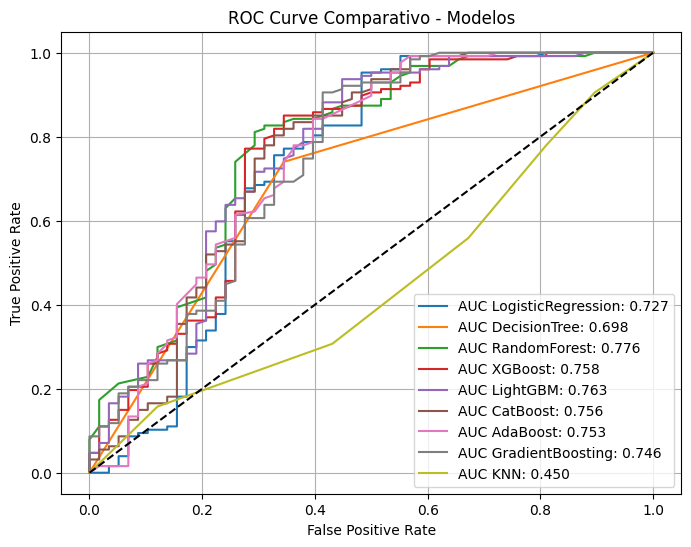

In [50]:
resultados = []
plt.figure(figsize=(8, 6))

for nombre, modelo in modelos.items():
    if nombre == "LogisticRegression":
        modelo.fit(X_train_scaled, y_train_bal)
        y_prob = modelo.predict_proba(X_test_scaled)[:, 1]
    else:
        modelo.fit(X_train_bal[features_seleccionadas], y_train_bal)
        y_prob = modelo.predict_proba(X_test[features_seleccionadas])[:, 1]

    y_pred = (y_prob >= 0.60).astype(int)

    acc, auc, f1, prec, rec = eval_metrics(y_test, y_pred, y_prob)
    resultados.append({
        "Modelo": nombre,
        "Accuracy": acc,
        "AUC": auc,
        "F1_Score_0.60": f1,
        "Precision": prec,
        "Recall": rec
    })

    plot_roc_curve(y_test, y_prob, auc, nombre)

plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.title("ROC Curve Comparativo - Modelos")
plt.grid(True)
plt.show()

# 6. Comparación de modelos.

In [51]:
df_resultados = pd.DataFrame(resultados).sort_values(by="F1_Score_0.60", ascending=False).reset_index(drop=True)
df_resultados

,Modelo,Accuracy,AUC,F1_Score_0.60,Precision,Recall
0,RandomForest,0.778378,0.775658,0.836653,0.846774,0.826772
1,CatBoost,0.767568,0.756381,0.831373,0.828125,0.834646
2,XGBoost,0.756757,0.757602,0.816327,0.847458,0.787402
3,GradientBoosting,0.713514,0.746063,0.785425,0.808333,0.763780
4,LightGBM,0.713514,0.762761,0.780083,0.824561,0.740157
5,DecisionTree,0.713514,0.697665,0.780083,0.824561,0.740157
6,LogisticRegression,0.686486,0.727464,0.752137,0.822430,0.692913
7,KNN,0.486486,0.449633,0.599156,0.645455,0.559055
8,AdaBoost,0.383784,0.752512,0.240000,0.782609,0.141732


- **Mejor modelo:** Random Forest
- **F1-Score:** 0.837
- **Accuracy:** 0.778
- **AUC:** 0.776
- **Precision:** 0.847
- **Recall:** 0.827

**Comparación con otros modelos:**
- CatBoost tiene un F1 de 0.831 con menor Accuracy (0.768).
- XGBoost tiene un F1 de 0.816 con menor Accuracy (0.757).
- Modelos como AdaBoost y KNN tienen bajo F1 (0.24 y 0.60) pese a AUC moderado, mostrando que no son adecuados.

**Trade-off complejidad vs interpretabilidad:**
- Random Forest es un modelo de ensamble con buena interpretabilidad mediante importancia de variables.
- CatBoost y XGBoost tienen métricas similares, pero su complejidad y necesidad de ajuste de hiperparámetros son mayores.
- Modelos simples como Logistic Regression ofrecen interpretabilidad completa, pero su F1 (0.75) es menor.

**Conclusión:**
- **Se selecciona Random Forest como mejor modelo, ya que ofrece el mejor equilibrio entre alto desempeño (F1 más alto) y entendimiento del modelo (feature importance clara), con buena precisión y recall en la predicción del riesgo crediticio.**


# 7. Consistencia de resultados.

In [52]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [53]:
# Concatenar Train + Test
X_full = pd.concat([X_train_bal[features_seleccionadas], X_test[features_seleccionadas]], axis=0)
y_full = pd.concat([y_train_bal, y_test], axis=0)

In [54]:
rf = RandomForestClassifier(
    max_depth=4,
    n_estimators=20,
    random_state=45
)

In [55]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=45)

f1_scores = cross_val_score(
    rf,
    X_full,
    y_full,
    scoring='f1',
    cv=kf
)

print(f"F1-Scores por fold: {np.round(f1_scores,4)}")
print(f"Promedio F1-Score (10-fold CV): {np.round(f1_scores.mean(),4)}")
print(f"Desviación estándar: {np.round(f1_scores.std(),4)}")

F1-Scores por fold: [0.8247 0.8571 0.8511 0.8485 0.8723 0.8842 0.82   0.8632 0.8478 0.8211]
Promedio F1-Score (10-fold CV): 0.849
Desviación estándar: 0.0207


**Conclusión:**
- El modelo mantiene un F1-Score promedio incluso *superior* (0.849) respecto al obtenido en el entrenamiento inicial (0.837), demostrando **estabilidad y generalización adecuada**.
- La baja desviación estándar (0.021) indica que el modelo es consistente entre los distintos folds y **no está sesgado a la muestra de entrenamiento**.
- Por tanto, el Random Forest entrenado es estable y confiable para inferir riesgos crediticios en esta tarea.

# 8. Tunning Hiperparámetros

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 15),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

rf_base = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=15,
    scoring='f1',
    cv=10,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

random_search.fit(X_train_bal[features_seleccionadas], y_train_bal)

print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

print(f"\nMejor F1-Score promedio en CV de 10 folds: {round(random_search.best_score_, 4)}")

Fitting 10 folds for each of 15 candidates, totalling 150 fits
Mejores hiperparámetros encontrados:
{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 109}

Mejor F1-Score promedio en CV de 10 folds: 0.8362


- Los mejores hiperparámetros fueron: max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=109.


- En la etapa (6) logramos un **F1-Score promedio de 0.849** usando Random Forest, lo que muestra un **muy buen rendimiento** del modelo para predecir el riesgo de préstamo.
- En la etapa (8), después de ajustar hiperparámetros, el modelo tuvo un **F1-Score promedio de 0.8362**, confirmando que el modelo se mantiene **estable y confiable** aunque con un leve ajuste en el rendimiento.


# 9. Importancia de variables

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


rf_final = RandomForestClassifier(
    max_depth=4,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=109,
    random_state=42
)
rf_final.fit(X_train_bal[features_seleccionadas], y_train_bal)


importances = rf_final.feature_importances_
feat_importance_df = pd.DataFrame({
    'Variable': features_seleccionadas,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


feat_importance_df

,Variable,Importance
3,Credit_History,0.696554
0,Dependents,0.109280
1,ApplicantIncome,0.088102
4,Married_Flag,0.057060
2,CoapplicantIncome,0.049004


/tmp/ipython-input-58-2877974566.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


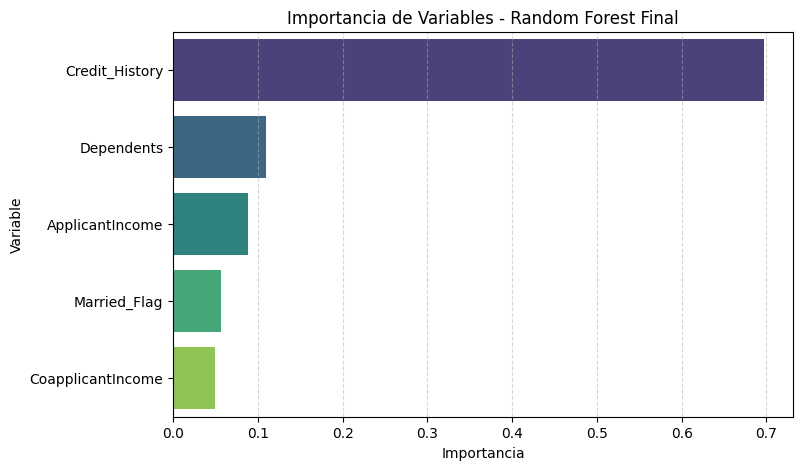

In [58]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=feat_importance_df,
    x='Importance',
    y='Variable',
    palette='viridis'
)
plt.title('Importancia de Variables - Random Forest Final')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()

**Credit_History es la variable clave para inferir riesgos, mientras que las variables de ingresos y dependientes aportan información complementaria que hace sentido en la evaluación crediticia y del riesgo de incumplimiento.**

**Posibles próximos pasos:**

- Probar con otros algoritmos combinados (stacking) para ver si se puede mejorar un poco más el F1.
- Usar herramientas de interpretabilidad (SHAP o LIME) para **explicar qué variables impactan más** en la predicción.
- Validar el modelo en nuevos datos que no hayan sido usados para entrenamiento para confirmar su estabilidad.
- Preparar el flujo para usar el modelo en la práctica, actualizándolo periódicamente con nuevos datos.